In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module, which can be installed with a simple:



In [1]:
!pip install CFEDemands

The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet can be found at
[https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/](https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/).

This spreadsheet consists of two worksheets, labeled &ldquo;Expenditures&rdquo;
and &ldquo;Household Characteristics&rdquo;, respectively.

Each worksheet has the initial three columns labeled &ldquo;j&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;j&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (j,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet should
have one column for each category of expenditures (e.g., &ldquo;Rice&rdquo;, &ldquo;Goat
meat&rdquo;, &ldquo;Millet&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in the ICRISAT data:
namely numbers of &ldquo;Men&rdquo;, &ldquo;Women&rdquo;, &ldquo;Boys&rdquo; and &ldquo;Girls&rdquo;; also the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Indian ICRISAT example that I wish to work
through.



In [1]:
Sheets = {'ICRISAT':'13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo',
         # 'Your dataset':'Your google spreadsheet key',
         }

With the spreadsheet defined , grab it and define a couple of
dataframes. Note that the spreadsheet must be public for this approach
to work!



In [6]:
import pandas as pd
import numpy as np

# The function below adapted from Gianmario Spacagna's suggestion at
# https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
def dataframe_from_gspreadsheet(sheet_name, key):
    """Transform public google spreadsheet into pandas.DataFrame."""
    
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))

    df = pd.read_csv(url)

    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

# Change 'ICRISAT' to key of your own sheet in Sheets, above
x = dataframe_from_gspreadsheet("Expenditures", Sheets['ICRISAT'])

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = dataframe_from_gspreadsheet("Household Characteristics", Sheets['ICRISAT'])

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

This gives a dataframe of household characteristics $z$ with a simple structure.



In [7]:
z.head()

,,,M 0-3,F 0-3,M 4-8,F 4-8,M 9-13,F 9-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log Hsize
j,t,m,,,,,,,,,,,,,,,
A1,75,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1.945910
A10,75,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1.791759
A12,75,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1.098612
A2,75,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000
A3,75,1,0,0,0,0,0,2,0,0,1,0,0,0,0,1,1.386294


Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [4]:
y.head()

,,,Other,Other Food,Other Narcotics,Clothing,"Medicine, cosmetics, etc.",Travel & Entertainment,Utilities,Domestic labor,Ceremonial expenses,Edible oils,...,Other spices,YB,YK,YZ,ZA,ZB,ZF,Gur (jaggery),ZJ,ZK
j,t,m,,,,,,,,,,,,,,,,,,,,,
A1,75,1,NaN,NaN,1.131402,5.552960,NaN,NaN,2.714695,NaN,NaN,2.406945,...,2.459589,NaN,NaN,NaN,NaN,NaN,NaN,-0.693147,NaN,NaN
A10,75,1,NaN,NaN,NaN,4.976734,NaN,NaN,2.525729,NaN,NaN,2.778819,...,3.010621,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
A12,75,1,NaN,NaN,NaN,1.098612,NaN,NaN,2.433613,NaN,NaN,2.054124,...,2.054124,NaN,NaN,NaN,NaN,NaN,NaN,-0.693147,NaN,NaN
A2,75,1,NaN,NaN,NaN,4.477337,NaN,NaN,2.251292,NaN,NaN,2.476538,...,2.174752,NaN,NaN,NaN,NaN,NaN,NaN,0.405465,NaN,NaN
A3,75,1,NaN,NaN,NaN,4.094345,NaN,NaN,2.163323,NaN,NaN,1.974081,...,1.945910,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


With nothing more than this, we can estimate the demand system.  This
happens in two steps.  The first is the &ldquo;reduced form&rdquo; step:



In [8]:
import cfe

result = cfe.Result(y=y,z=z)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [1]:
result

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [9]:
result.get_reduced_form()

/home/ethanligon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


After running this we can examine the estimated coefficients $\delta$:



In [10]:
result.delta.to_dataframe().unstack('k')

delta            \
k                                                      F 0-3   F 14-18   
i                                                                        
Barber service (and material relating to it)       -0.175517  0.051679   
Bengalgram dhal                                    -0.329210  0.032611   
Brinjal                                            -0.146298  0.033967   
Ceremonial expenses                                -0.053238  0.364653   
Chillies                                           -0.083236  0.008356   
Clothing                                           -0.182997 -0.011827   
Coconut                                            -0.234838  0.058048   
Complete meals in hotel                             0.240410 -0.090966   
Cosmetics tooth paste etc.                         -0.199226  0.059566   
Edible oils                                         0.051319 -0.007944   
Educational material expenses (pen, books, pape...  0.227427  0.126982   
Ghee                                               -0.360318 -0.305721   
Grinding/milling charges                           -0.106707 -0.014944   
Groundnuts                                         -0.353677 -0.016514   
Gur (jaggery)                                      -0.026192  0.055116   
Jowar/Sorghum (HYV)                                 0.125101 -0.007824   
Jowar/Sorghum (Local variety)                      -0.323794 -0.021315   
Medicine Doctor's fees                              0.034958 -0.017735   
Milk                                               -0.108580  0.000373   
Onion                                              -0.005468 -0.094798   
Other dhal                                         -0.324071  0.007470   
Other spices                                       -0.120811 -0.025668   
Other sugar products                                0.067687 -0.055705   
Other vegetables                                   -0.035023 -0.119911   
Pan, betel, etc.                                   -0.000265  0.072612   
Processed foods (e.g. biscuits Khara, syrup, ba... -0.023874 -0.220040   
Redgram dhal                                       -0.208896 -0.003542   
Rice (local variety)                                0.008841 -0.040664   
Soap, washing powder                               -0.053425  0.045728   
Sugar                                              -0.299465 -0.070307   
Tea                                                 0.145293  0.012029   
Tobacco, beedi                                      0.005465 -0.036066   
Tomato                                             -0.320413 -0.046443   
Travel & Entertainment                             -0.204789  0.044737   
Utilities                                          -0.010488  0.020136   
Wheat (HYV)                                         0.324991  0.240737   

                                                                        \
k                                                    F 19-30   F 31-50   
i                                                                        
Barber service (and material relating to it)       -0.079511  0.065185   
Bengalgram dhal                                     0.117643  0.335690   
Brinjal                                             0.059085  0.027392   
Ceremonial expenses                                 0.056343  0.200341   
Chillies                                            0.095332  0.279386   
Clothing                                            0.113659  0.416491   
Coconut                                             0.184028  0.202727   
Complete meals in hotel                             0.295855  0.225875   
Cosmetics tooth paste etc.                          0.249935  0.276144   
Edible oils                                         0.098286  0.241672   
Educational material expenses (pen, books, pape...  0.200866  0.379238   
Ghee                                                0.042080 -0.051980   
Grinding/milling charges                            0.0512

Also the good-time constants $a_{it}$:



In [11]:
result.a.to_dataframe().unstack('i')

a                            \
i    Barber service (and material relating to it) Bengalgram dhal   Brinjal   
t  m                                                                          
75 1                                     1.569202        2.384558 -0.690582   
76 1                                     0.467068        1.441811  0.371863   
77 1                                     0.285231        1.812404  0.253417   
78 1                                     0.282672        1.896916  0.198275   
79 1                                     0.292149        2.145621  0.500910   
80 1                                     0.334010        2.146256  0.907021   
81 1                                     0.815534        1.985348  1.247384   
82 1                                     0.455555        1.958906  0.500010   
83 1                                     0.626310        2.259020  0.188871   
84 1                                     1.737029        2.549001  2.476360   

                                                        \
i    Ceremonial expenses  Chillies  Clothing   Coconut   
t  m                                                     
75 1            2.489396  2.482062  2.822307  0.024896   
76 1            1.915650  3.080600  3.569434  0.052982   
77 1            0.965155  2.902397  3.482471  0.582652   
78 1            1.356623  2.823856  3.468926  0.618594   
79 1            1.565318  3.198998  3.466322  1.137889   
80 1            1.630707  3.251901  3.843010  1.111884   
81 1            0.959177  3.504898  3.948444  1.430204   
82 1            0.693548  2.895137  3.477786  1.290482   
83 1            1.717278  1.540971  3.193916  1.557921   
84 1            2.763881  2.416773  3.778084       NaN   

                                                                     \
i    Complete meals in hotel Cosmetics tooth paste etc. Edible oils   
t  m                                                                  
75 1                1.739906                   0.825884    2.532866   
76 1                2.055805                   1.339525    3.141671   
77 1                2.366018                   1.431025    3.523524   
78 1                2.930517                   1.435658    3.176978   
79 1                2.084027                   1.685249    3.851738   
80 1                2.104684                   1.790707    4.121195   
81 1                3.315428                   2.036072    3.812711   
82 1                3.312780                   1.480661    3.770354   
83 1                4.194982                  -1.146669    1.131093   
84 1                     NaN                        NaN    2.368835   

         ...                                                             \
i        ...     Redgram dhal Rice (local variety) Soap, washing powder   
t  m     ...                                                              
75 1     ...         3.202284             3.130946             0.294528   
76 1     ...         1.792613             2.006490             0.659113   
77 1     ...         2.917689             2.690877             0.915852   
78 1     ...         2.145460             2.769688             1.035408   
79 1     ...         2.690296             3.042069             1.455115   
80 1     ...         2.877348             3.489835             1.463322   
81 1     ...         2.860452             3.851506             1.459143   
82 1     ...         2.684517             3.674949             1.220578   
83 1     ...         3.364206             3.740382             0.584687   
84 1     ...         3.546709             3.464945                  NaN   

                                                                          \
i        Sugar       Tea Tobacco, beedi    Tomato Travel & Entertainment   
t  m                                                                       
75 1  1.110670  2.045148       1.900812 -0.758995               1.998176   
76 1  1.444582  2.548720       2.825266  0.406305            

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [12]:
result.get_beta().to_dataframe()

,beta
i,
Barber service (and material relating to it),0.182836
Bengalgram dhal,0.809819
Brinjal,0.452520
Ceremonial expenses,1.195106
Chillies,0.382074
Clothing,0.677213
Coconut,0.252895
Complete meals in hotel,0.131315
Cosmetics tooth paste etc.,0.728466


That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



/home/ethanligon/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


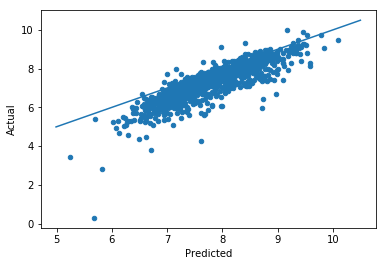

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])